In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 准备数据集
# 此处自己生成一些原始的数据点
dataset_X=np.linspace(-10,10,100)
dataset_y=2*np.square(dataset_X)+7 # 即label是feature的平方*2，偏置是7
dataset_y /=np.linalg.norm(dataset_y) # 归一化处理
dataset_X=dataset_X[:,np.newaxis]

Text(0.5,1,'dataset distribution')

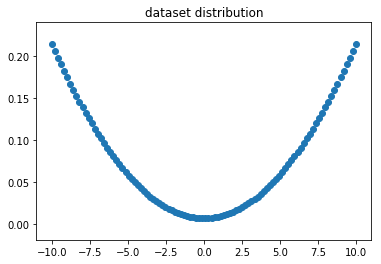

In [3]:
# 查看数据集的分布情况
plt.scatter(dataset_X,dataset_y)
plt.title('dataset distribution')

In [4]:
# 构建并训练模型
import neurolab as nl
x_min, x_max = dataset_X[:,0].min(), dataset_X[:,0].max()
multilayer_net = nl.net.newff([[x_min, x_max]], [10, 10, 1])
# 模型结构：隐含层有两层，每层有10个神经元，输出层一层。
multilayer_net.trainf = nl.train.train_gd # 设置训练算法为梯度下降
dataset_y=dataset_y[:,np.newaxis]
error = multilayer_net.train(dataset_X, dataset_y, epochs=800, show=100, goal=0.01)

Epoch: 100; Error: 0.8664195162339818;
Epoch: 200; Error: 0.021679766890450557;
Epoch: 300; Error: 0.020744747122209976;
The goal of learning is reached


Text(0.5,1,'Training error progress')

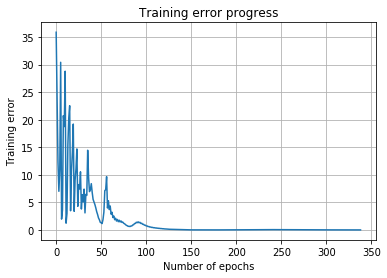

In [5]:
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.grid()
plt.title('Training error progress')

Text(0.5,1,'Comparison of Truth and Predicted')

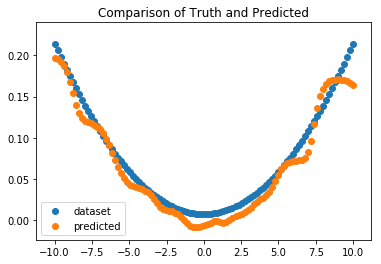

In [6]:
# 用训练好的模型来预测
predict_y=multilayer_net.sim(dataset_X)
plt.scatter(dataset_X,dataset_y,label='dataset')
plt.scatter(dataset_X,predict_y,label='predicted')
plt.legend()
plt.title('Comparison of Truth and Predicted')